In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget
np.random.seed(42)

expert = "expert"
id = "3"
session = "1"

# Define the input and output paths
data_in_path = f'data/connectivity/{expert}_{id}_{session}/'

# Read connectivity data from npy files
data = np.load(f'{data_in_path}connectivity.npy')
channel_names = np.load(f'{data_in_path}channel_names.npy')
freqs = np.load(f'{data_in_path}frequencies.npy')

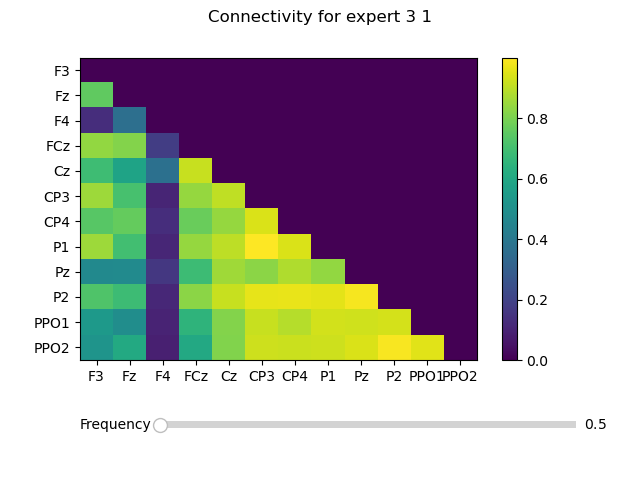

In [4]:
# Create the plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
t = 0
l = plt.imshow(data[:, :, t], cmap='viridis', aspect='auto')
axcolor = 'lightgoldenrodyellow'
axtime = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
stime = Slider(axtime, 'Frequency', freqs[0], freqs[-1], valinit=freqs[t], valstep=freqs[1]-freqs[0])

# Update the image when the slider is moved
def update(val):
    freq = stime.val
    t = np.argmin(np.abs(freqs - freq))
    l.set_data(data[:, :, t])
    fig.canvas.draw_idle()
stime.on_changed(update)

# Set labels as the electrode names
ax.set_xticks(np.arange(len(channel_names)))
ax.set_yticks(np.arange(len(channel_names)))
ax.set_xticklabels(channel_names)
ax.set_yticklabels(channel_names)

# Add a colorbar
plt.colorbar(l)

# Add title
fig.suptitle(f'Connectivity for {expert} {id} {session}')

# Show the plot in an interactive window
plt.show()